# 图像边缘检测
## Canny边缘检测
- 1）使用高斯滤波器，以平滑图像，消除噪声；
- 2）计算图像中每个像素点的梯度强度和方向；
- 3）应用非极大值抑制(Non-Maximum Suppression)，以消除边缘检测带来的杂散效应；
- 4）应用双阈值(Double-Threshold)检测来确定真实和潜在的边缘；
- 5）通过抑制孤立的弱边缘最终完成边缘检测。

### 1. 高斯滤波器
$$
H = \begin{pmatrix} 0.0924&0.1192&0.0924\\0.1192&0.1538&0.1192\\0.0924&0.1192&0.0924 \end{pmatrix}
$$
> 这里H矩阵还进行了归一化处理

$$
e = H*A = \begin{pmatrix} h_{11}&h_{12}&h_{13}\\h_{21}&h_{22}&h_{23}\\h_{31}&h_{32}&h_{33} \end{pmatrix}*\begin{pmatrix} a&b&c\\d&e&f\\g&h&i \end{pmatrix}
$$
> e等于H和A取内积

### 2. 梯度和方向
$$
G = \sqrt{G_x^2+G_y^2},\quad  \theta = arctan(\frac{G_y}{G_x})
$$

$$
S_x = \begin{pmatrix} -1&0&1\\-2&0&2\\-1&0&1\end{pmatrix},\quad S_y = \begin{pmatrix} -1&-2&-1\\0&0&0\\1&2&1\end{pmatrix}
$$

$$
G_x = S_x * A,\quad G_y = S_y * A
$$

### 3. 非极大值抑制
- 方法一：线性插值法
<img src="images_for_note/linear_interpole.jpg" width = "40%" height = "40%"/>

判断目标点C是否应该保留：沿着其梯度方向，与临近区域交于Q、Z两点，使用线性插值的方法分别计算这两点的梯度值：
$$
M(Q) = w*M(g_2) + (1 - w)M(g_1)
$$

其中$w = distance(g_2, Q)/distance(g_1, g_2)$，distance表示两点之间的距离。

如果C点的梯度幅值均大于Q、Z两点处的梯度幅值，则保留C点，否则抑制C点。

- 方法二：
<img src="images_for_note/discrete.jpg" width = "70%" height = "60%"/>

### 4. 双阈值检测
- 梯度值 > maxval：处理为边界；
- minval < 梯度值 < maxval：连有边界则保留，否则舍弃；
- 梯度值 < minval：舍弃。

> minval 越小，表示条件越松，越希望检测出更多的边缘信息；反之，则条件越苛刻；

> maxval越小，表示条件越松；反之，条件越苛刻。

In [1]:
# 导入库
import cv2
import numpy as np
import matplotlib.pyplot as plt

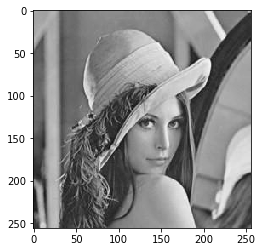

In [2]:
# 读入图像
img_lena = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_lena, cmap = plt.cm.gray)

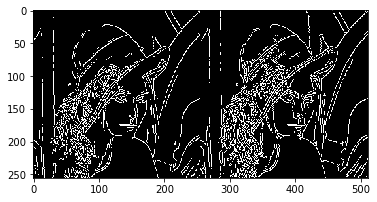

In [4]:
# 边缘检测
v1 = cv2.Canny(img_lena, 100, 150)# higher minval
v2 = cv2.Canny(img_lena, 50, 150)# lower minval
res = np.hstack((v1, v2))
plt.imshow(res, cmap=plt.cm.gray)

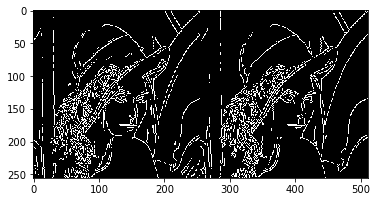

In [6]:
# 边缘检测
v1 = cv2.Canny(img_lena, 100, 150)# lower maxval
v2 = cv2.Canny(img_lena, 100, 230)# higher maxval
res = np.hstack((v1, v2))
plt.imshow(res, cmap=plt.cm.gray)

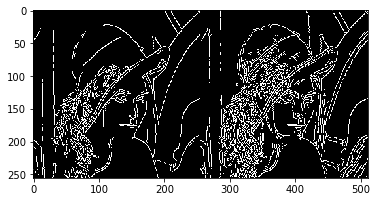

In [7]:
# 边缘检测
v1 = cv2.Canny(img_lena, 120, 250)# strict
v2 = cv2.Canny(img_lena, 50, 100)# loose
res = np.hstack((v1, v2))
plt.imshow(res, cmap=plt.cm.gray)